In [1]:
#1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from utils import *
import utils
import pandas as pd
%matplotlib inline

In [4]:
first_few = pd.read_csv("./dataeng.csv")
first_few.head()

,139.5,139.5.1,135.699997,136.300003
0,136.300003,137.750000,134.300003,134.949997
1,137.449997,138.149994,130.000000,133.250000
2,133.600006,133.949997,129.350006,131.600006
3,131.949997,135.100006,131.000000,132.600006
4,133.199997,133.199997,122.250000,124.199997


In [105]:
#2
data = np.loadtxt('./dataeng.csv', delimiter=',', skiprows="1")
x1_train = data[:100,0] # open

x2_train = data[:100,2] # low
x3_train = data[:100,3] # close

X_train = np.delete(data[:100], 1, axis=1) #main cleaned numpy
y_train = data[:100,1] # high <- we need to predict this thing

X1_cv = np.delete(data[900:1000], 1, axis=1)
y_cv = data[900:1000, 1]

X1_ts = np.delete(data[1000:], 1, axis=1)
y_ts = data[1000:, 1]

print(f"Y_train {y_train.shape} x_train shape {X_train.shape} ")
print(f"Y_train {y_cv.shape} x_train shape {X1_cv.shape} ")

Y_train (100,) x_train shape (100, 3) 
Y_train (100,) x_train shape (100, 3) 


In [106]:
# open, high, low and close of x_1[0,0]
print(f"x[0,0]: \n{X_train[:5]} \n data : \n{data[:5]}")

x[0,0]: 
[[139.5      135.699997 136.300003]
 [136.300003 134.300003 134.949997]
 [137.449997 130.       133.25    ]
 [133.600006 129.350006 131.600006]
 [131.949997 131.       132.600006]] 
 data : 
[[139.5      139.5      135.699997 136.300003]
 [136.300003 137.75     134.300003 134.949997]
 [137.449997 138.149994 130.       133.25    ]
 [133.600006 133.949997 129.350006 131.600006]
 [131.949997 135.100006 131.       132.600006]]


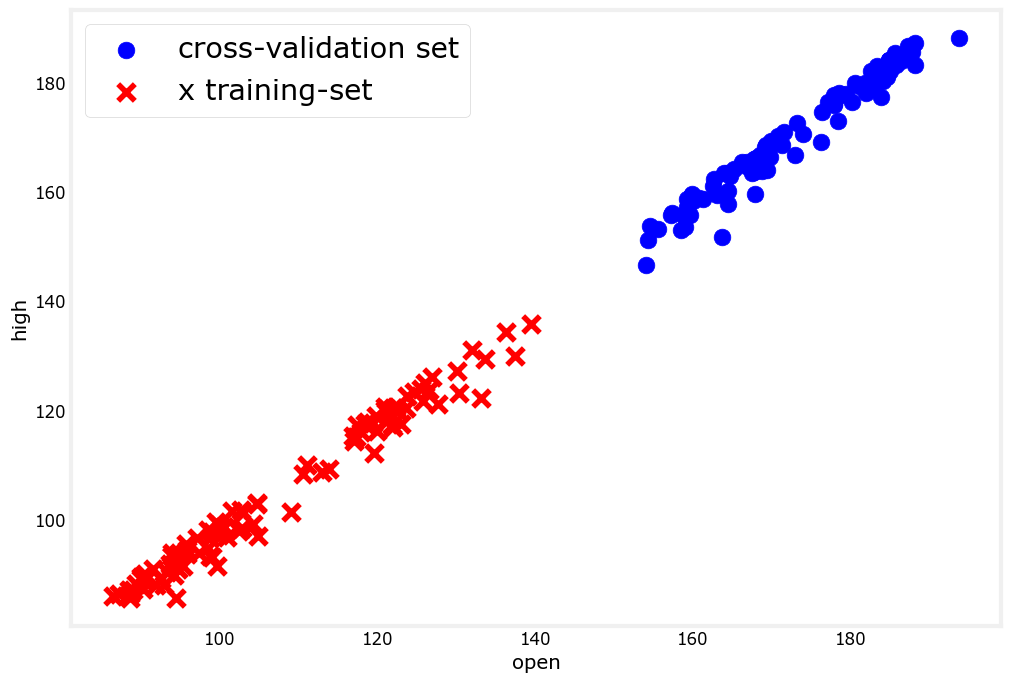

In [107]:
# we will try to create an algorithm that predicts the high of a day M
# but first lets try to plot the data
fig, ax = plt.subplots(1,1)
ax.scatter(x3_cv, x2_cv, marker='o', c='b', label="cross-validation set")
ax.scatter(x1_train, x2_train, marker='x', c='r', label='x training-set' )
ax.legend(fontsize='xx-large')
ax.set_ylabel('high')
ax.set_xlabel('open')
plt.show()

In [108]:
#4
linreg = LinearRegression()
linreg.fit(X_train, y_train)
# utils.train_plot_poly(model, X_train, Y_train, X_cv, Y_cv, max_degree=10, baseline=400)

LinearRegression()

In [109]:
y_pred = linreg.predict(X1_ts[:])

print(f"predicted val: {y_pred[:6]}\nactual val: {y_ts[:6]} ")

predicted val: [197.20389885 198.91332254 198.88393629 195.31867414 193.4855032
 193.149754  ]
actual val: [196.75     198.399994 198.5      193.949997 192.5      192.100006] 


In [111]:
linreg.score(X1_ts, y_pred)

1.0